In [2]:
import numpy as np
import pandas as pd 
import os.path
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, svm, metrics
from sklearn.calibration import calibration_curve, CalibrationDisplay
# from sklearn.calibration import calibration_curve
import  sklearn.calibration

import matplotlib.pyplot as plt
import tensorflow_probability as tfp

from sklearn.model_selection import StratifiedKFold
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold

In [3]:
import sklearn
# sklearn.__version__
sklearn.show_versions()


System:
    python: 3.8.8 (default, Apr 13 2021, 12:59:45)  [Clang 10.0.0 ]
executable: /Users/mizukikadowaki/opt/anaconda3/bin/python
   machine: macOS-10.16-x86_64-i386-64bit

Python dependencies:
          pip: 21.3.1
   setuptools: 58.0.4
      sklearn: 1.0.1
        numpy: 1.21.2
        scipy: 1.7.1
       Cython: 0.29.24
       pandas: 1.3.4
   matplotlib: 3.4.3
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


In [6]:
sklearn.__version__

'1.0.1'

In [ ]:
# import tensorflow as tf
# tensorflow.__version__

# Screening Dataset Logistic Regression

In [4]:
data_path = os.path.join("..","data", "screening", "screening_data.csv")
data = pd.read_csv(data_path)
training_variables = ['satisfactoryCreditHistory',
       'applicantIncomeLog', 'coapplicantIncomeLog', 'loanAmountLog',
       'loanAmountTermLog', 'totalIncomeLog', 'isMarried',
       'has1Dependent', 'has2Dependents', 'has3+Dependents', 'hasNotGraduated',
       'isSelfEmployed', 'livesSemiurbal', 'livesUrban']


In [5]:
data.columns

Index(['loanID', 'applicantIncome', 'coapplicantIncome', 'loanAmount',
       'loanAmountTerm', 'satisfactoryCreditHistory', 'totalIncome',
       'applicantIncomeLog', 'coapplicantIncomeLog', 'loanAmountLog',
       'loanAmountTermLog', 'totalIncomeLog', 'isMale', 'isMarried',
       'has1Dependent', 'has2Dependents', 'has3+Dependents', 'hasNotGraduated',
       'isSelfEmployed', 'livesSemiurbal', 'livesUrban', 'outcome'],
      dtype='object')

In [6]:
data

,loanID,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,satisfactoryCreditHistory,totalIncome,applicantIncomeLog,coapplicantIncomeLog,loanAmountLog,...,isMale,isMarried,has1Dependent,has2Dependents,has3+Dependents,hasNotGraduated,isSelfEmployed,livesSemiurbal,livesUrban,outcome
0,LP001002,5849,0.0,142.51153,360.0,1.00000,5849.0,8.674026,-2.302585,4.959423,...,1,0,0,0,0,0,0,0,1,1
1,LP001003,4583,1508.0,128.00000,360.0,1.00000,6091.0,8.430109,7.318540,4.852030,...,1,1,1,0,0,0,0,0,0,0
2,LP001005,3000,0.0,66.00000,360.0,1.00000,3000.0,8.006368,-2.302585,4.189655,...,1,1,0,0,0,0,1,0,1,1
3,LP001006,2583,2358.0,120.00000,360.0,1.00000,4941.0,7.856707,7.765569,4.787492,...,1,1,0,0,0,1,0,0,1,1
4,LP001008,6000,0.0,141.00000,360.0,1.00000,6000.0,8.699515,-2.302585,4.948760,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,4009,1777.0,113.00000,360.0,1.00000,5786.0,8.296297,7.482682,4.727388,...,1,1,0,0,1,1,1,0,1,0
977,LP002975,4158,709.0,115.00000,360.0,1.00000,4867.0,8.332789,6.563856,4.744932,...,1,1,0,0,0,0,0,0,1,0
978,LP002980,3250,1993.0,126.00000,360.0,0.83592,5243.0,8.086410,7.597396,4.836282,...,1,0,0,0,0,0,0,1,0,0
979,LP002986,5000,2393.0,158.00000,360.0,1.00000,7393.0,8.517193,7.780303,5.062595,...,1,1,0,0,0,0,0,0,0,0


In [7]:
X = data[training_variables]
y = data["outcome"]

In [8]:
def classify(model,x,y):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.25, random_state=47)
    model.fit(X_train, y_train)
    print('Model',model)
    print("Accuracy is", model.score(X_test, y_test)* 100)
    # cross  validation for better validation
    kfold = model_selection.KFold(n_splits=10,random_state=42, shuffle=True)
    score = model_selection.cross_val_score(model, x, y, cv=kfold)
    print("Cross Val", np.mean(score)*100)
#     ROC curve + AUC
    train_roc = metrics.plot_roc_curve(model, X_train, y_train)
    test_roc = metrics.plot_roc_curve(model, X_test, y_test) 
    plt.show()
# Reliability diagram train
    y_prob = model.predict_proba(X_train)[:, 1]
#     tf.convert_to_tensor(y_pred, dtype = tf.int64)
    prob_true, prob_pred = calibration_curve(y_train, y_prob, n_bins=10)
    disp = sklearn.calibration.CalibrationDisplay(prob_true, prob_pred, y_prob)
    disp = sklearn.calibration.CalibrationDisplay(prob_true, prob_pred, y_prob)
    disp.plot()
    
#     y_train_tensor = tf.convert_to_ten
#     y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
#     y_prob_tensor = tf.convert_to_tensor(y_prob, dtype=tf.float32)
#     y_pred_proba = clf.predict_proba(X_train)
#     logit_tensor = tf.convert_to_tensor(y_pred_proba, dtype = tf.float32, name = 'logits')
#     print(tfp.expected_calibration_error(num_bins=15, logits = logit_tensor, labels_true=y_train_tensor, labels_predicted=y_prob_tensor))
    
# reliability diagram Test
    y_prob = model.predict_proba(X_test)[:, 1]
    prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
    disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
    disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
    disp.plot()
#     print(tfp.python.stats.expected_calibration_error(num_bins=15, labels_true=y_test, labels_predicted=y_prob))


/Users/mizukikadowaki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mizukikadowaki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Model LogisticRegression()
Accuracy is 56.09756097560976
Cross Val 60.851370851370845


/Users/mizukikadowaki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mizukikadowaki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

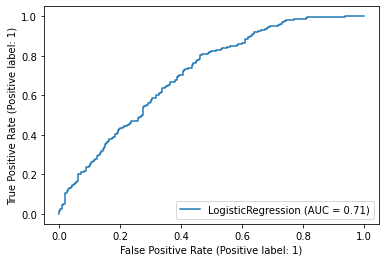

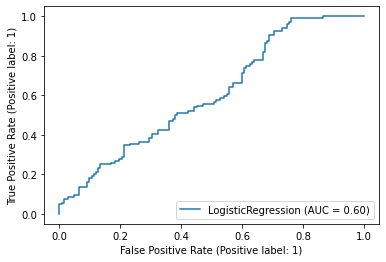

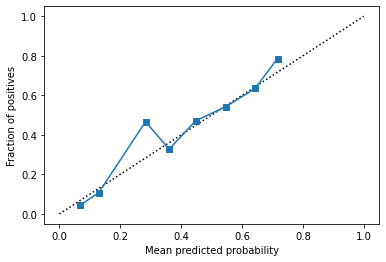

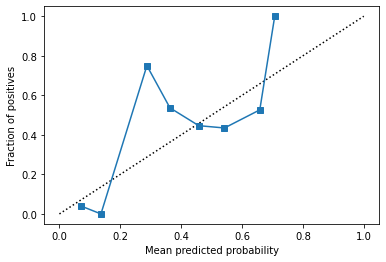

In [9]:
classify(LogisticRegression(), X, y)

# Logistic Regression - Different Approach

In [10]:
# training
data_path = os.path.join("..", "data", "screening", "raw", "Train Dataset.csv")
df1 = pd.read_csv(data_path)
# missing values
df1['Credit_History']=df1['Credit_History'].fillna(df1['Credit_History'].mean())
df1['Loan_Amount_Term']=df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean())
df1['LoanAmount']=df1['LoanAmount'].fillna(df1['LoanAmount'].mean())
df1['Dependents']=df1['Dependents'].fillna(df1['Dependents'].mode()[0])
df1['Gender']=df1['Gender'].fillna(df1['Gender'].mode()[0])
df1['Married']=df1['Married'].fillna(df1['Married'].mode()[0])
df1['Self_Employed']=df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])
# drop loan ID
df1 = df1.drop(columns=['Loan_ID'])

In [26]:
# testing
data_path = os.path.join("..", "data", "screening", "raw", "Test Dataset.csv")
data_samp = os.path.join("..", "data", "screening", "raw", "Sample_Submission.csv")
df2 = pd.read_csv(data_path)
df3 = pd.read_csv(data_samp)

df2 = pd.DataFrame.merge(df2, df3, on = "Loan_ID")

# missing values
df2['Gender']=df2['Gender'].fillna(df2['Gender'].mode()[0])
df2['Dependents']=df2['Dependents'].fillna(df2['Dependents'].mode()[0])
df2['Self_Employed']=df2['Self_Employed'].fillna(df2['Self_Employed'].mode()[0])
df2['LoanAmount']=df2['LoanAmount'].fillna(df2['LoanAmount'].mean())
df2['Loan_Amount_Term']=df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mean())
df2['Credit_History']=df2['Credit_History'].fillna(df2['Credit_History'].mean())
# drop loan ID
df2=df2.drop(columns=['Loan_ID']) 

In [27]:
data=pd.concat([df1,df2],axis=0) 

In [28]:
data_path = os.path.join("..", "data", "screening", "screening_data.csv")
data = pd.read_csv(data_path)
data.head()

,loanID,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,satisfactoryCreditHistory,totalIncome,applicantIncomeLog,coapplicantIncomeLog,loanAmountLog,...,isMale,isMarried,has1Dependent,has2Dependents,has3+Dependents,hasNotGraduated,isSelfEmployed,livesSemiurbal,livesUrban,outcome
0,LP001002,5849,0.0,142.51153,360.0,1.0,5849.0,8.674026,-2.302585,4.959423,...,1,0,0,0,0,0,0,0,1,1
1,LP001003,4583,1508.0,128.00000,360.0,1.0,6091.0,8.430109,7.318540,4.852030,...,1,1,1,0,0,0,0,0,0,0
2,LP001005,3000,0.0,66.00000,360.0,1.0,3000.0,8.006368,-2.302585,4.189655,...,1,1,0,0,0,0,1,0,1,1
3,LP001006,2583,2358.0,120.00000,360.0,1.0,4941.0,7.856707,7.765569,4.787492,...,1,1,0,0,0,1,0,0,1,1
4,LP001008,6000,0.0,141.00000,360.0,1.0,6000.0,8.699515,-2.302585,4.948760,...,1,0,0,0,0,0,0,0,1,1


In [14]:
class ChiSquare:
    def __init__(self, dataframe):
        self.data = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.data[colX].astype(str)
        Y = self.data[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [15]:
#Initialize ChiSquare Class
cT = ChiSquare(data)

#Feature Selection
testColumns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
data_cols = ['loanID', 'applicantIncome', 'coapplicantIncome', 'loanAmount',
       'loanAmountTerm', 'satisfactoryCreditHistory', 'totalIncome',
       'applicantIncomeLog', 'coapplicantIncomeLog', 'loanAmountLog',
       'loanAmountTermLog', 'totalIncomeLog', 'isMale', 'isMarried',
       'has1Dependent', 'has2Dependents', 'has3+Dependents', 'hasNotGraduated',
       'isSelfEmployed', 'livesSemiurbal', 'livesUrban']
      
       
for var in data_cols:
    cT.TestIndependence(colX=var,colY="outcome" )

loanID is NOT an important predictor. (Discard loanID from model)
applicantIncome is NOT an important predictor. (Discard applicantIncome from model)
coapplicantIncome is NOT an important predictor. (Discard coapplicantIncome from model)
loanAmount is NOT an important predictor. (Discard loanAmount from model)
loanAmountTerm is NOT an important predictor. (Discard loanAmountTerm from model)
satisfactoryCreditHistory is IMPORTANT for Prediction
totalIncome is NOT an important predictor. (Discard totalIncome from model)
applicantIncomeLog is NOT an important predictor. (Discard applicantIncomeLog from model)
coapplicantIncomeLog is NOT an important predictor. (Discard coapplicantIncomeLog from model)
loanAmountLog is NOT an important predictor. (Discard loanAmountLog from model)
loanAmountTermLog is NOT an important predictor. (Discard loanAmountTermLog from model)
totalIncomeLog is NOT an important predictor. (Discard totalIncomeLog from model)
isMale is NOT an important predictor. (Dis

In [17]:
# categorical_features = ['Gender', 'Married', 'Dependents',
#  'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [30]:
# data.drop(columns=['gender', 'married', 'education','applicantIncome', 'coapplicantIncome', 'loanAmount'],inplace = True)

#Encoding Categorical Variables

# labelencoder=LabelEncoder()
# for col in data.columns:
#     data[col] = labelencoder.fit_transform(data[col])
    
#Now one hot encoding
# data=pd.get_dummies(data, columns=['Gender', 'Married', 'Dependents','Education',"Loan_Amount_Term",'Self_Employed',"Credit_History","Property_Area"],drop_first=False)
                                   
                                   

KeyError: "['gender' 'married' 'education'] not found in axis"

In [36]:
X = data[["satisfactoryCreditHistory", "isMarried", "livesSemiurbal", "outcome"]]
# data.columns

In [33]:
# X = data.drop(columns=['loanID', 'applicantIncome', 'coapplicantIncome', 'loanAmount',
                   'loanAmountTerm', 'satisfactoryCreditHistory', 'totalIncome','isMale', 'isMarried',
                   'has1Dependent', 'has2Dependents', 'has3+Dependents', 'hasNotGraduated',
                   'isSelfEmployed', 'livesSemiurbal', 'livesUrban'])

## train

In [37]:
#Separating features and label
y=X['outcome']
X=X.drop(['outcome'],axis=1)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=47)

kfold = model_selection.StratifiedKFold(n_splits=3,shuffle=True, random_state=42)

Model LogisticRegression()
Accuracy is 62.19512195121951
Cross Val 62.89115646258503


/Users/mizukikadowaki/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/mizukikadowaki/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


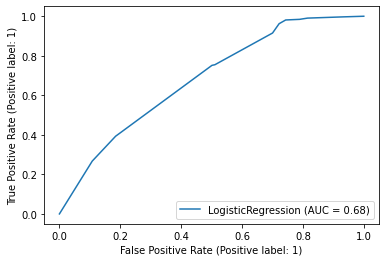

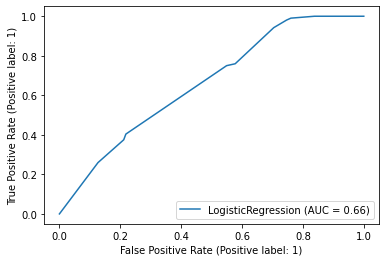

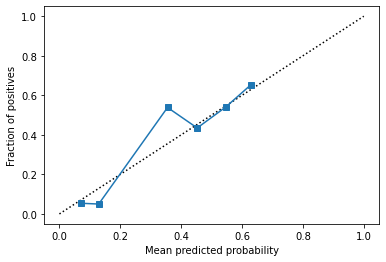

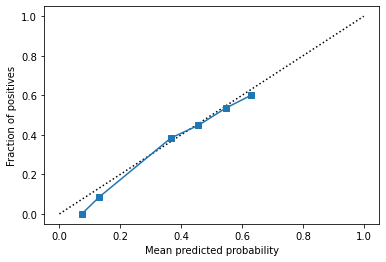

In [38]:
classify(LogisticRegression(), X, y)

In [22]:
rs = 15
clrs = []

# clrs.append(AdaBoostClassifier(random_state=rs))
# clrs.append(GradientBoostingClassifier(random_state=rs))
# clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(LogisticRegression(random_state = rs))
# clrs.append(ExtraTreesClassifier(random_state = rs))


cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,
                      "Algo":["Logistic Regression"
#                               ,"RandomForestClassifier"
#                               ,"AdaBoostClassifier"
#                               ,"Gradient Boosting"
#                               ,'ExtraTreesClassifier'
                             ]})

In [146]:
# g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std})
# g.set_xlabel("Mean Accuracy")
# g = g.set_title("Cross validation scores")
# print(cv_df)